In [13]:
import os
import torch
from PIL import Image
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms.v2 as v2
from displayUtils import displayImageGrid

transform = v2.Compose([
    v2.Resize((224, 224)),  # Resize images to fit Swin Transformer input dimensions
    v2.ToImage(), 
    v2.ToDtype(torch.float32, scale=True)]
)


class TestDataset(Dataset):
    def __init__(self, data_path, transform=None):
        super().__init__()
        self.data_path = data_path
        self.transform = transform
        self.annotations = self._load_annotations()

    def _load_annotations(self):
        annotations = []
        for subfolder in ['real', 'fake']:
            subfolder_path = os.path.join(self.data_path, subfolder)
            for root, _, files in os.walk(subfolder_path):
                for file in files:
                    if file.endswith('.jpg'):
                        image_path = os.path.join(root, file)
                        label = 1 if subfolder == 'real' else 0
                        annotations.append((image_path, label))
        return annotations

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        image_path, label = self.annotations[index]
        image = Image.open(image_path).convert('RGB')
        if self.transform is not None:
            image = self.transform(image)
        return image, label

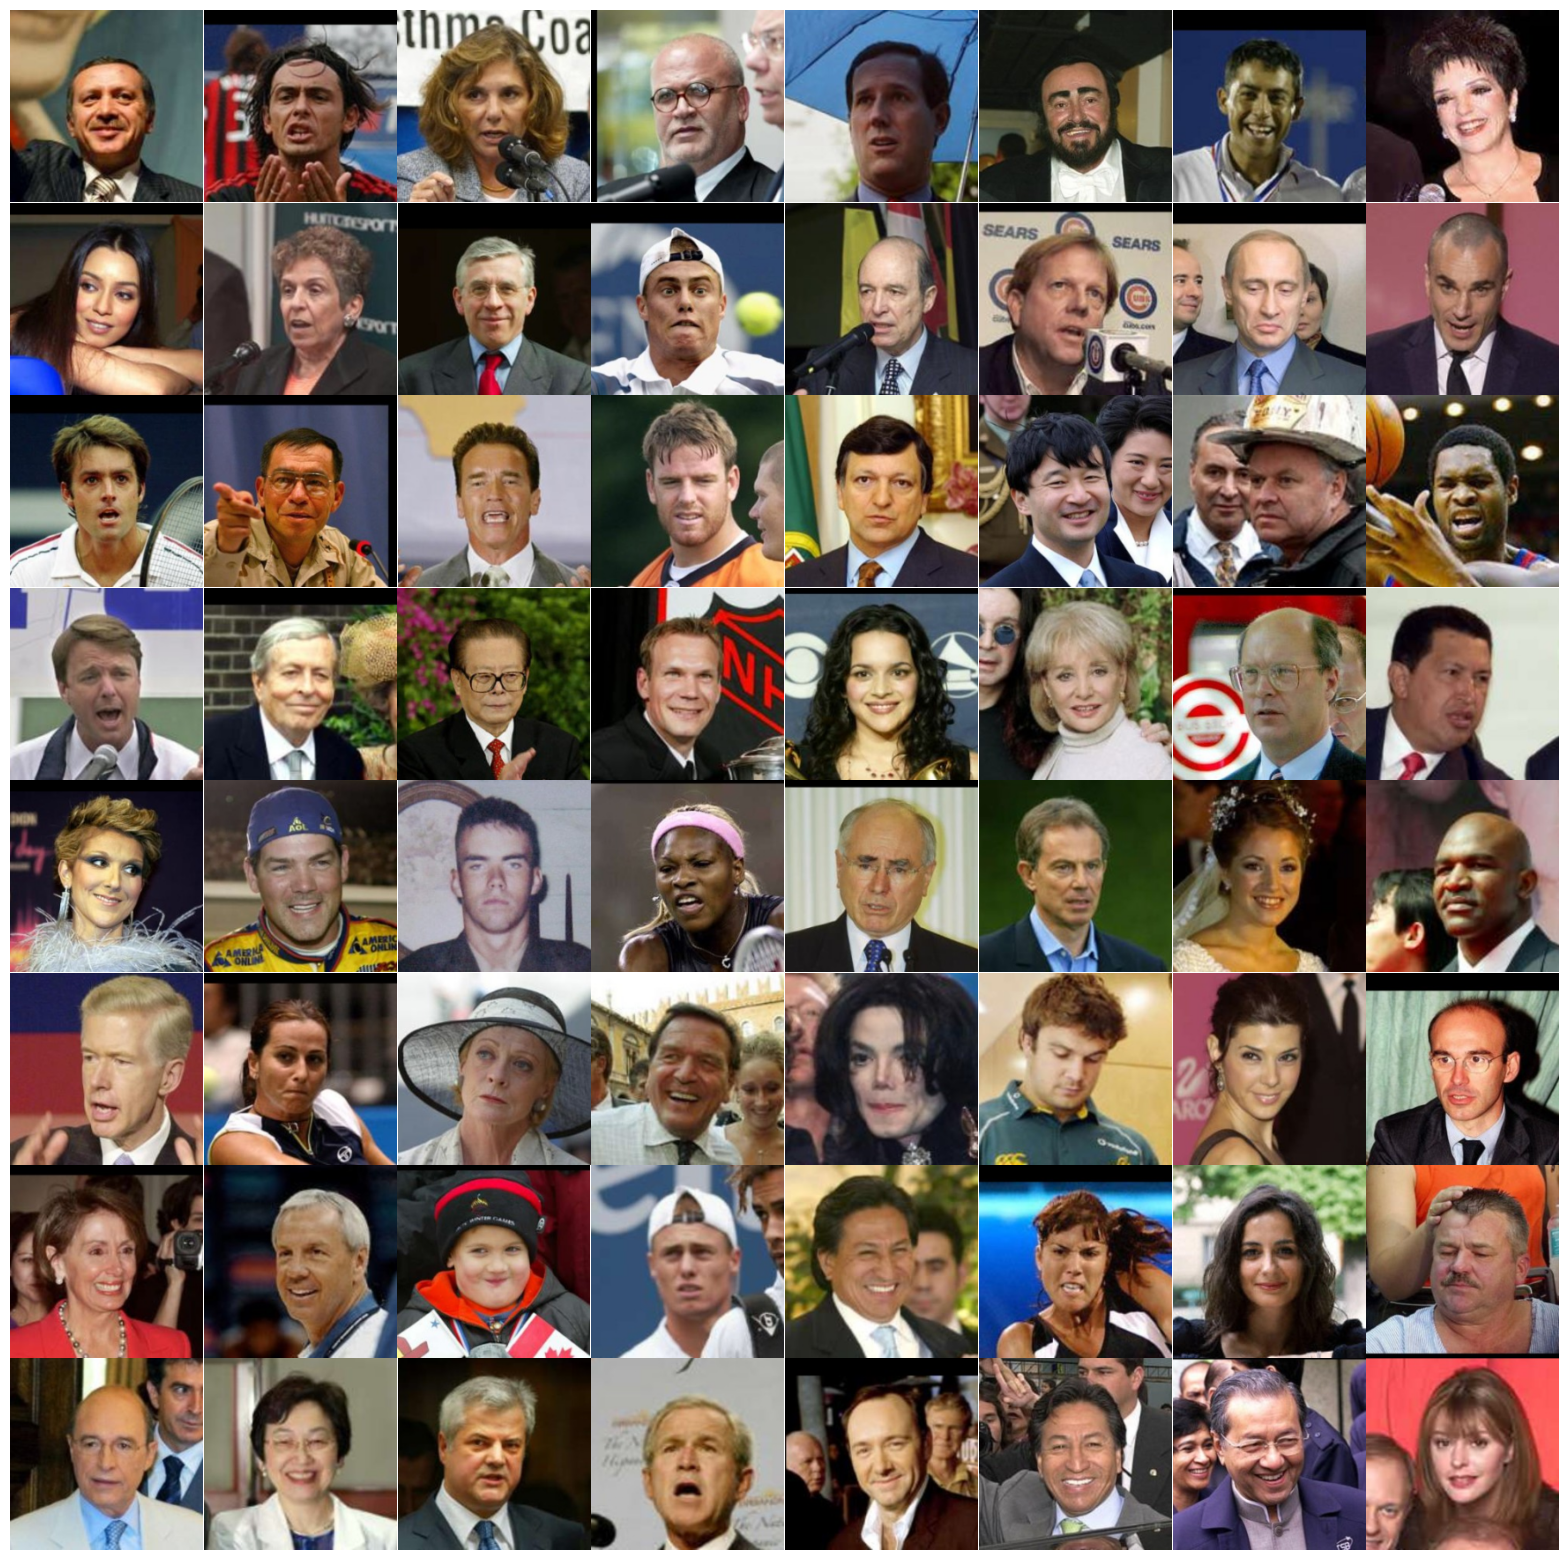

In [16]:
DATA_PATH = r'datasets\\tempDataset'
BATCH_SIZE = 64
testInstance = TestDataset(DATA_PATH, transform=transform)

testDataLoader = DataLoader(testInstance, batch_size=BATCH_SIZE, shuffle=True)

features, labels = next(iter(testDataLoader))
features: torch.Tensor
labels: torch.Tensor


featuresArray = features.numpy().transpose(2, 3, 1, 0)

displayImageGrid([featuresArray[..., idx] for idx in range(BATCH_SIZE)], H=8, W=8, figsize=(20, 20))

print()